In [1]:
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(43)

In [2]:
def generate_rand_cities(n_cities):
    positions = np.zeros((n_cities, 2))
    for i in range(n_cities):
        positions[i, 0] = np.random.rand()
        positions[i, 1] = np.random.rand()
        
    lengths = np.zeros((n_cities, n_cities))
    
    for i in range(n_cities):
        for j in range(i+1, n_cities):
            _length = (positions[i, 0] - positions[j, 0])**2.0 + (positions[i, 1] - positions[j, 1])**2.0 
            lengths[i, j] = m.sqrt(_length)
    
    lengths = lengths + lengths.T
            
    return positions, lengths

def generate_init_genes(n_individuals, n_cities):
    genes = []
    for i in range(n_individuals):
        order = np.random.permutation(np.arange(0, n_cities))
        genes.append(order)
        
    return np.array(genes)

def calc_fitness(genes, lengths):
    
    fitness = []
    for gene in genes:
        _length = 0.0
        for i in range(0, lengths.shape[0] - 1):
            _length += lengths[gene[i],gene[i +1] ]
            
        _length += lengths[gene[-1], gene[0]]
    
        fitness.append(1.0 / _length)
    
    return np.array(fitness)

def generate_roulette(fitness):
    roulette = fitness / fitness.sum()
    
    return roulette

def roulette_choice(roulette):
    return np.random.choice(np.arange(len(roulette)), 2, replace=False, p=roulette)

def partial_crossover(parent1, parent2):
    
    cross_point = random.randrange(1, len(parent1))
    offspring1 = parent1
    offspring2 = parent2
    
    for i in range(cross_point, len(parent1)):
        target_value1 = parent1[i]
        target_value2 = parent2[i]
        
        exchange_idx1 = np.where(parent1 == target_value2)
        exchange_idx2 = np.where(parent2 == target_value1)
        
        offspring1[i] = target_value2
        offspring2[i] = target_value1
        offspring1[exchange_idx1] = target_value1
        offspring2[exchange_idx2] = target_value2
    
    return offspring1, offspring2

def translocation_mutation(gene):
    exchange_indices = np.random.choice(np.arange(len(gene)), replace=False, size=2)
    _val = gene[exchange_indices[0]]
    gene[exchange_indices[0]] = gene[exchange_indices[1]]
    gene[exchange_indices[1]] = _val
    
    return gene

def show_map(positions, gene):
    try:
        plt.cla()
        plt.clf()
        plt.close()
    except:
        pass
    
    for i in range(len(gene) - 1):
        if i == 0:
            plt.text(positions[gene[i], 0], positions[gene[i], 1], "start")
        else:
            plt.text(positions[gene[i], 0], positions[gene[i], 1], "{}".format(i))
            plt.plot([positions[gene[i], 0], positions[gene[i + 1], 0]], [positions[gene[i], 1], positions[gene[i + 1], 1]])
    plt.text(positions[gene[i + 1], 0], positions[gene[i + 1], 1], "goal")

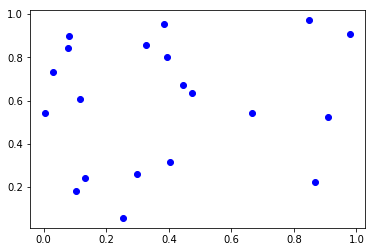

In [3]:
n_cities = 20
n_individuals = 20

positions, maps = generate_rand_cities(n_cities)

plt.plot(positions[:, 0], positions[:, 1], "o", color="b")

Intiial gene
[12  9 17 18  3 19  6 14 15  4  0  5 11  1  7 16  2 10 13  8]


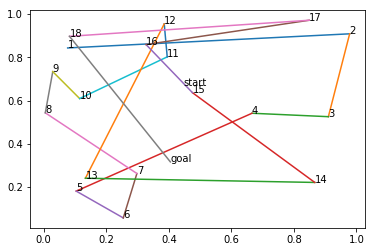

In [4]:
best_individuals = []
n_generations = 1000
n_elites = 10
p_mutation = 0.05

genes = generate_init_genes(n_individuals, n_cities)
fitness = calc_fitness(genes, maps)

print("Intiial gene")
show_map(positions, genes[np.argsort(fitness)[-1]])

print(genes[np.argsort(fitness)[-1]])

for i in range(0, n_generations):
    fitness = calc_fitness(genes, maps)
    best_fit_idx = np.argsort(fitness)[-1]
    best_individuals.append(fitness[best_fit_idx])
    
    offsprings = np.empty_like(genes)
    for j in range(int((n_individuals - n_elites) * 0.5)):
        roulette = generate_roulette(fitness)
        parents_indices = roulette_choice(roulette)
        offspring1, offspring2 = partial_crossover(genes[parents_indices[0]], genes[parents_indices[0]])
        offsprings[2 * j] = offspring1
        offsprings[2 * j + 1] = offspring2
    
    for j in range(n_individuals - n_elites, n_individuals):
        if np.random.rand() < p_mutation:
            offsprings[j] = translocation_mutation(genes[np.argsort(fitness)[j]])
        else:
            offsprings[j] = genes[np.argsort(fitness)[j]]   
    
    genes = offsprings

Final gene
[18  7  3 16  8 14  6 19  1  0  4 15  9 13  2 11  5 12 10 17]


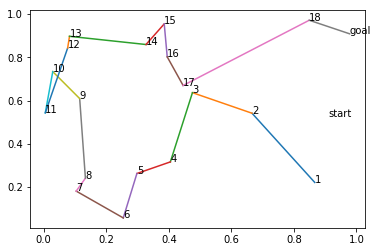

In [5]:
print("Final gene")
print(genes[np.argsort(fitness)[-1]])
show_map(positions, genes[np.argsort(fitness)[-1]])